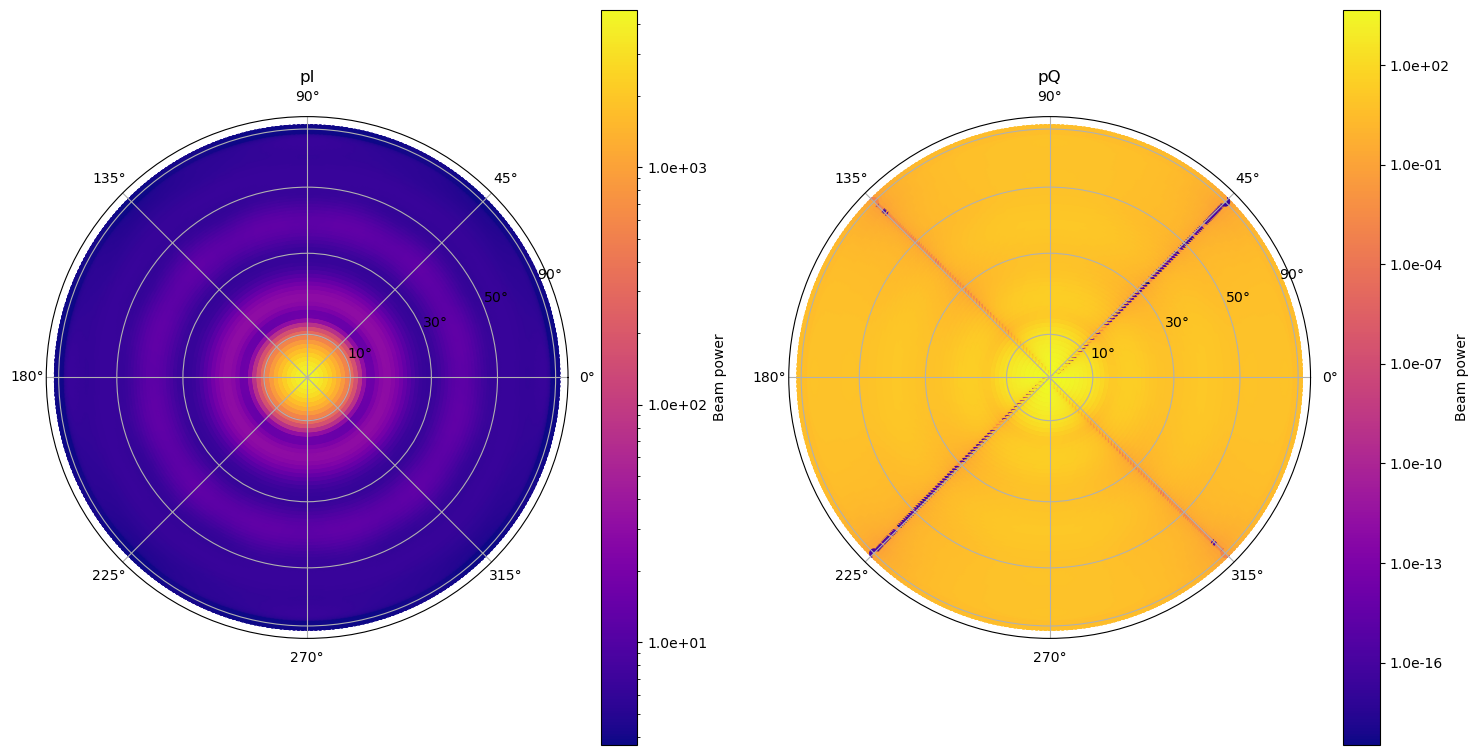

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
from pyuvdata import utils, UVBeam
from pyuvdata.datasets import fetch_data

cst_yml_file = fetch_data("hera_fagnoni_dipole_yaml")
beam = UVBeam.from_file(cst_yml_file, beam_type="efield")

# this beam file is very large. Let's cut down the size to ease the computation
za_max = np.deg2rad(90.0)
za_inds_use = np.nonzero(beam.axis2_array <= za_max)[0]
beam.select(axis2_inds=za_inds_use)

pstokes_beam = beam.efield_to_pstokes(inplace=False)

# plotting pseudo-stokes
pol_array = pstokes_beam.polarization_array
pI_ind = np.where(np.isin(pol_array, utils.polstr2num("pI")))[0][0]
pQ_ind = np.where(np.isin(pol_array, utils.polstr2num("pQ")))[0][0]

# Now plot the pixels on an polar projection with zenith in the center
radial_ticks_deg = [10, 30, 50, 90]
az_array, za_array = np.meshgrid(pstokes_beam.axis1_array, pstokes_beam.axis2_array)
az_za_radial_val = np.sin(za_array)
fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw=dict(projection="polar"), figsize=(15, 15))
ax1.grid(True)
img1 = ax1.scatter(az_array, az_za_radial_val, c=pstokes_beam.data_array[0,  pI_ind, 0], cmap="plasma", norm=LogNorm())
cbar=plt.colorbar(img1, ax=ax1, label="Beam power", orientation="vertical",shrink=.5, format="%4.1e")
_ = ax1.set_yticks(np.sin(np.deg2rad(radial_ticks_deg)))
_ = ax1.set_yticklabels([f"{rt}" + r"$\degree$" for rt in radial_ticks_deg])
_ = ax1.set_title("pI")

ax2.grid(True)
img2 = ax2.scatter(az_array, az_za_radial_val, c=pstokes_beam.data_array[0,  pQ_ind, 0], cmap="plasma", norm=LogNorm())
cbar=plt.colorbar(img2, ax=ax2, label="Beam power", orientation="vertical",shrink=.5, format="%4.1e")
_ = ax2.set_yticks(np.sin(np.deg2rad(radial_ticks_deg)))
_ = ax2.set_yticklabels([f"{rt}" + r"$\degree$" for rt in radial_ticks_deg])
_ = ax2.set_title("pQ")

fig.tight_layout()

plt.show()
# plt.savefig("Images/hera_pstokes.png", bbox_inches="tight")
# plt.clf()

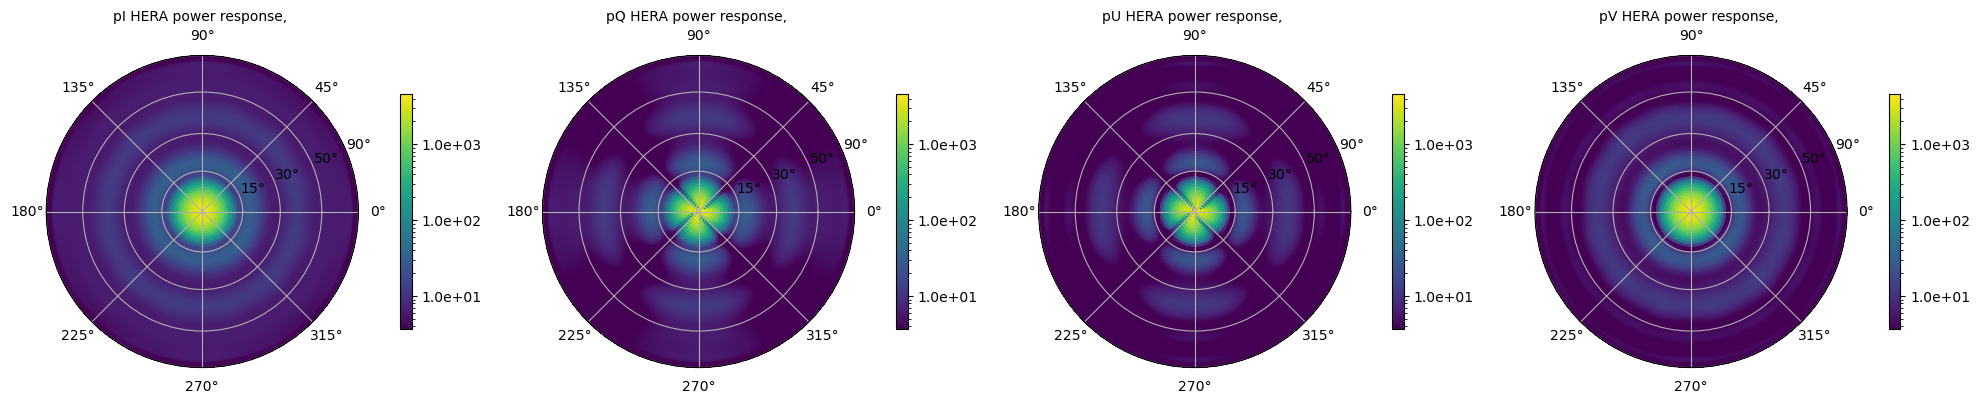

<Figure size 640x480 with 0 Axes>

In [2]:

from pyuvdata import UVBeam
from pyuvdata.datasets import fetch_data

fetch_data(["hera_fagnoni_dipole_123", "hera_fagnoni_dipole_150"])
cst_yml_file = fetch_data("hera_fagnoni_dipole_yaml")
beam = UVBeam.from_file(cst_yml_file, beam_type="efield")

pstokes_beam = beam.efield_to_pstokes(inplace=False)
pstokes_beam.plot()
